In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# excercise with help of resources from Manuel Amunategui - https://github.com/amunategui

### Create dataframe (Commitment of Traders - GOLD (CMX) dataframe)

In [2]:
gld_cot_df = pd.read_csv('CFTC-088691_FO_ALL.csv')
gld_cot_df['Date'] = pd.to_datetime(gld_cot_df['Date'])
gld_cot_df = gld_cot_df.sort_values('Date', ascending=True)

In [3]:
print(min(gld_cot_df['Date']), max(gld_cot_df['Date']))
print(gld_cot_df.shape)
gld_cot_df.tail()

2006-06-13 00:00:00 2020-02-11 00:00:00
(714, 17)


,Date,Open Interest,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Swap Dealer Longs,Swap Dealer Shorts,Swap Dealer Spreads,Money Manager Longs,Money Manager Shorts,Money Manager Spreads,Other Reportable Longs,Other Reportable Shorts,Other Reportable Spreads,Total Reportable Longs,Total Reportable Shorts,Non Reportable Longs,Non Reportable Shorts
4,2020-01-14,1170516.0,87238.0,221969.0,119069.0,357136.0,162686.0,290193.0,27858.0,135078.0,109598.0,29844.0,197108.0,1100970.0,1131679.0,69546.0,38837.0
3,2020-01-21,1189723.0,92596.0,227553.0,113790.0,356358.0,163441.0,288676.0,29486.0,137451.0,112217.0,28461.0,208429.0,1116600.0,1151180.0,73123.0,38544.0
2,2020-01-28,1068985.0,71495.0,204315.0,111826.0,365105.0,158000.0,289525.0,31891.0,84170.0,114765.0,18031.0,171981.0,1001763.0,1033494.0,67222.0,35491.0
1,2020-02-04,1002910.0,62118.0,193876.0,113727.0,326757.0,150350.0,251743.0,40250.0,63405.0,119227.0,19314.0,174904.0,935475.0,968856.0,67435.0,34054.0
0,2020-02-11,1013330.0,64740.0,199356.0,114041.0,337699.0,153383.0,262135.0,32766.0,63514.0,115672.0,17674.0,172709.0,946194.0,977100.0,67136.0,36229.0


### Plotting Open Interest, Money Manager Longs and Money Manager Shorts

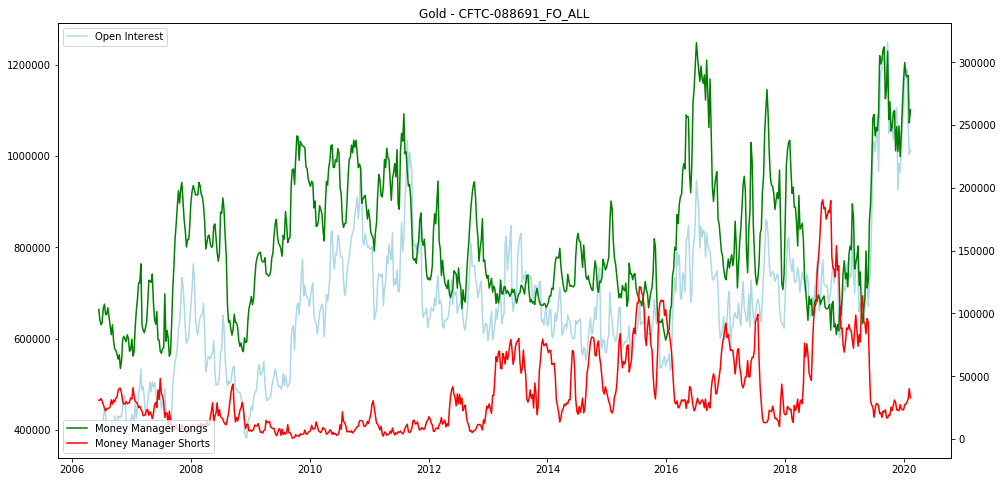

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(gld_cot_df['Date'],
        gld_cot_df['Open Interest'], color='lightblue', label='Open Interest')
plt.legend(loc='upper left')
plt.title('Gold - CFTC-088691_FO_ALL')

ax.twinx()
plt.plot(gld_cot_df['Date'], gld_cot_df['Money Manager Longs'], color='green', label='Money Manager Longs')
plt.legend(loc='lower left')

plt.plot(gld_cot_df['Date'], gld_cot_df['Money Manager Shorts'], color='red', label='Money Manager Shorts')
plt.legend(loc='lower left')

### Create gold dataframe (Gold Price: London Fixing)

In [5]:
# create gold dataframe (Gold Price: London Fixing)
gold_df = pd.read_csv('LBMA-GOLD.csv')
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
gold_df = gold_df[['Date', 'USD (PM)']]
gold_df = gold_df.dropna(how='any')
gold_df = gold_df.sort_values('Date', ascending=True)
print(min(gold_df['Date']), max(gold_df['Date']))
print(gold_df.shape)
gold_df.head()

1968-04-01 00:00:00 2020-02-19 00:00:00
(13037, 2)


,Date,USD (PM)
13124,1968-04-01,37.70
13123,1968-04-02,37.30
13122,1968-04-03,37.60
13121,1968-04-04,36.95
13120,1968-04-05,37.00


### Merging dataframes after the same date

In [6]:
start_date = '2006-06-13'
tmp_df1 = gold_df.copy()
tmp_df2 = gld_cot_df.copy()
tmp_df1 = tmp_df1[tmp_df1['Date'] >= start_date]
tmp_df2 = tmp_df2[tmp_df2['Date'] >= start_date]

merged_df = pd.merge(tmp_df1, 
                     tmp_df2, 
                     on=['Date'], 
                     how='inner')

merged_df = merged_df.fillna(method='ffill')
merged_df = merged_df.dropna(axis=0)
merged_df.head()

,Date,USD (PM),Open Interest,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Swap Dealer Longs,Swap Dealer Shorts,Swap Dealer Spreads,Money Manager Longs,Money Manager Shorts,Money Manager Spreads,Other Reportable Longs,Other Reportable Shorts,Other Reportable Spreads,Total Reportable Longs,Total Reportable Shorts,Non Reportable Longs,Non Reportable Shorts
0,2006-06-13,586.50,382474.0,42587.0,128892.0,19370.0,66611.0,22998.0,103211.0,30916.0,46704.0,33230.0,10656.0,58412.0,326513.0,365190.0,55961.0,17284.0
1,2006-06-20,567.00,390281.0,47440.0,126992.0,22404.0,64682.0,25806.0,94632.0,30963.0,48730.0,32947.0,11142.0,64458.0,336417.0,372774.0,53864.0,17507.0
2,2006-06-27,588.75,384321.0,48449.0,121890.0,22425.0,62640.0,25151.0,91042.0,32287.0,49614.0,31307.0,11386.0,59762.0,327749.0,362729.0,56572.0,21592.0
3,2006-07-03,622.95,392868.0,48087.0,122568.0,22720.0,69714.0,26352.0,92545.0,30452.0,50821.0,32874.0,8677.0,63514.0,336914.0,372098.0,55955.0,20771.0
4,2006-07-11,630.75,427008.0,54509.0,130618.0,21840.0,79217.0,28805.0,104213.0,27624.0,54922.0,33165.0,11194.0,70944.0,368398.0,403323.0,58611.0,23685.0


### Create and sort correlations list

In [7]:
correlations = []
for cot_feat in list(gld_cot_df):
    if cot_feat != 'Date':
        correlations.append([cot_feat, merged_df['USD (PM)'].corr(merged_df[cot_feat])])

In [8]:
sorted_corr = sorted(correlations, key=lambda x: x[1], reverse=True)
sorted_corr

[['Other Reportable Spreads', 0.7290966222639085],
 ['Swap Dealer Spreads', 0.7215914701136507],
 ['Open Interest', 0.6928105784633656],
 ['Total Reportable Longs', 0.690570840402055],
 ['Total Reportable Shorts', 0.6898024581120966],
 ['Other Reportable Longs', 0.47036219978572014],
 ['Money Manager Longs', 0.40154673222583026],
 ['Other Reportable Shorts', 0.3985010846465041],
 ['Swap Dealer Shorts', 0.362330933008295],
 ['Non Reportable Shorts', 0.3526757184453644],
 ['Producer/Merchant/Processor/User Longs', 0.3441452023283522],
 ['Producer/Merchant/Processor/User Shorts', 0.3428373110527596],
 ['Swap Dealer Longs', 0.33002232464079934],
 ['Non Reportable Longs', 0.25618881788339815],
 ['Money Manager Shorts', 0.013728144923187384],
 ['Money Manager Spreads', -0.2954542492298823]]

### Display of the chart for the best three results

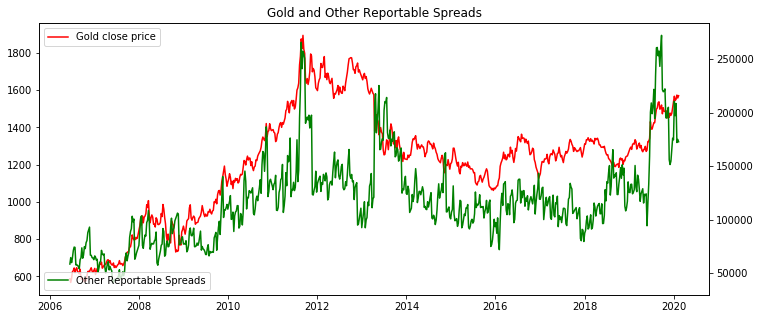

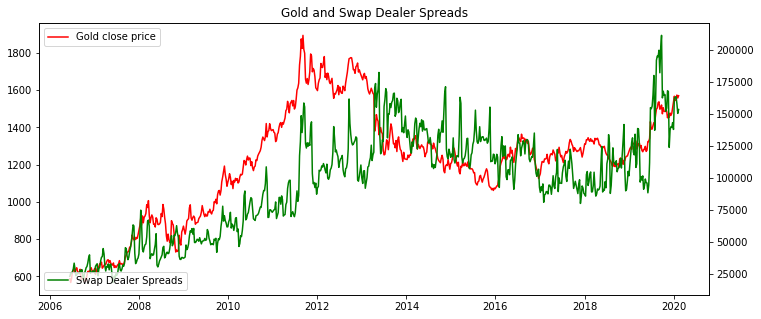

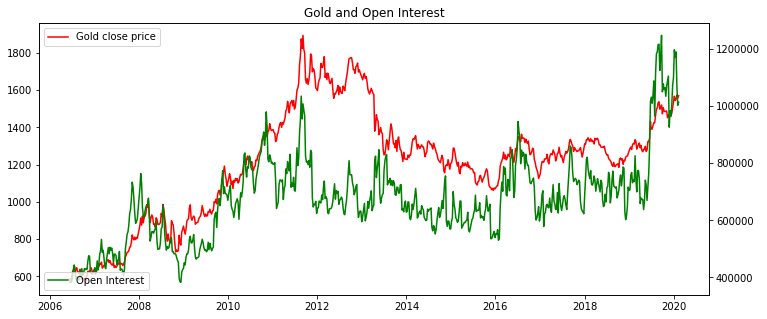

In [9]:
for source in sorted_corr[:3]:
    cot_feat = source[0]
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.plot(merged_df['Date'], merged_df['USD (PM)'], color='red', label='Gold close price')
    plt.legend(loc='upper left')
    plt.title('Gold and ' + cot_feat)

    ax.twinx()
    plt.plot(gld_cot_df['Date'], gld_cot_df[cot_feat], color='green', label=cot_feat)
    plt.legend(loc='lower left')